In [68]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
def read_pickle(filename: str) -> pd.DataFrame:
    with open(filename, 'rb') as f:
        return pd.DataFrame(pickle.load(f))

In [70]:
dataset_train_path = "data/02-processed/spanish/clusters_clf_test.pkl"
dataset_validation_path = "data/02-processed/spanish/clusters_clf_train.pkl"
dataset_test_path = "data/02-processed/spanish/clusters_clf_validation.pkl"

dataset_train = read_pickle(dataset_train_path)
dataset_validation = read_pickle(dataset_validation_path)
dataset_test = read_pickle(dataset_test_path)

In [71]:
# tsne
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, perplexity=min(30, len(dataset_train["sample"])-1), n_iter=1000)

X_2d = tsne.fit_transform(np.array(dataset_train["sample"].to_list()))

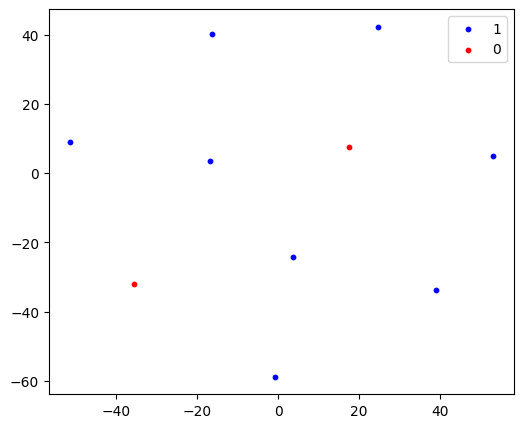

In [72]:
# represent the data in a scatter plot the are only 2 clusters the colors must be red for 0 and blue for 1
colors = ['red', 'blue']
plt.figure(figsize=(6, 5))
for i in range(len(X_2d)):
    plt.scatter(X_2d[i, 0], X_2d[i, 1], color=colors[dataset_train['label'][i]], s=10)
# add legend
plt.legend(['1', '0'], loc='upper right')
plt.show()

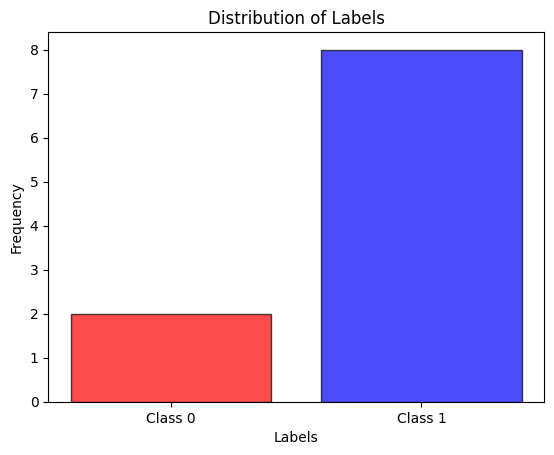

In [73]:
# Count the occurrences of each label
label_counts = dataset_train['label'].value_counts()

# Plot the histogram manually to assign colors per label
plt.bar(label_counts.index, label_counts.values, color=['blue', 'red'], alpha=0.7, edgecolor='black')

# Adding labels, legend, and title
plt.title("Distribution of Labels")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.xticks([0, 1], ['Class 0', 'Class 1'])
#plt.legend(['Class 0', 'Class 1'], loc="upper right")

# Show the plot
plt.show()

## CLF

In [74]:
from lazypredict.Supervised import LazyClassifier

In [75]:
X_train = np.array(dataset_train["sample"].to_list())
y_train = np.array(dataset_train["label"].to_list())
X_test = np.array(dataset_test["sample"].to_list())
y_test = np.array(dataset_test["label"].to_list())

In [76]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 31/31 [00:01<00:00, 30.71it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 8, number of negative: 2
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 10, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.800000 -> initscore=1.386294
[LightGBM] [Info] Start training from score 1.386294
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there

In [77]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreeClassifier                0.54               0.56     0.56      0.50   
LinearSVC                          0.51               0.54     0.54      0.45   
PassiveAggressiveClassifier        0.51               0.54     0.54      0.45   
AdaBoostClassifier                 0.51               0.53     0.53      0.49   
RidgeClassifierCV                  0.49               0.52     0.52      0.38   
RidgeClassifier                    0.49               0.52     0.52      0.38   
SGDClassifier                      0.49               0.51     0.51      0.43   
Perceptron                         0.49               0.51     0.51      0.43   
DecisionTreeClassifier             0.49               0.50     0.50      0.46   
QuadraticDiscriminantAnalysis      0.49               0.50     0.50      0.47   
DummyClassifier             